The needed libraries for this project

get the dataset from the link below

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
#there are some problems with github tho

C:\Users\Asus\AppData\Local\Temp\ipykernel_27308\213016091.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data is read using the read_csv in pandas library ##

In [2]:
data = pd.read_csv("creditcard.csv")
data_copy = data.copy()
df2 = data.copy()
data


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


*visualizing

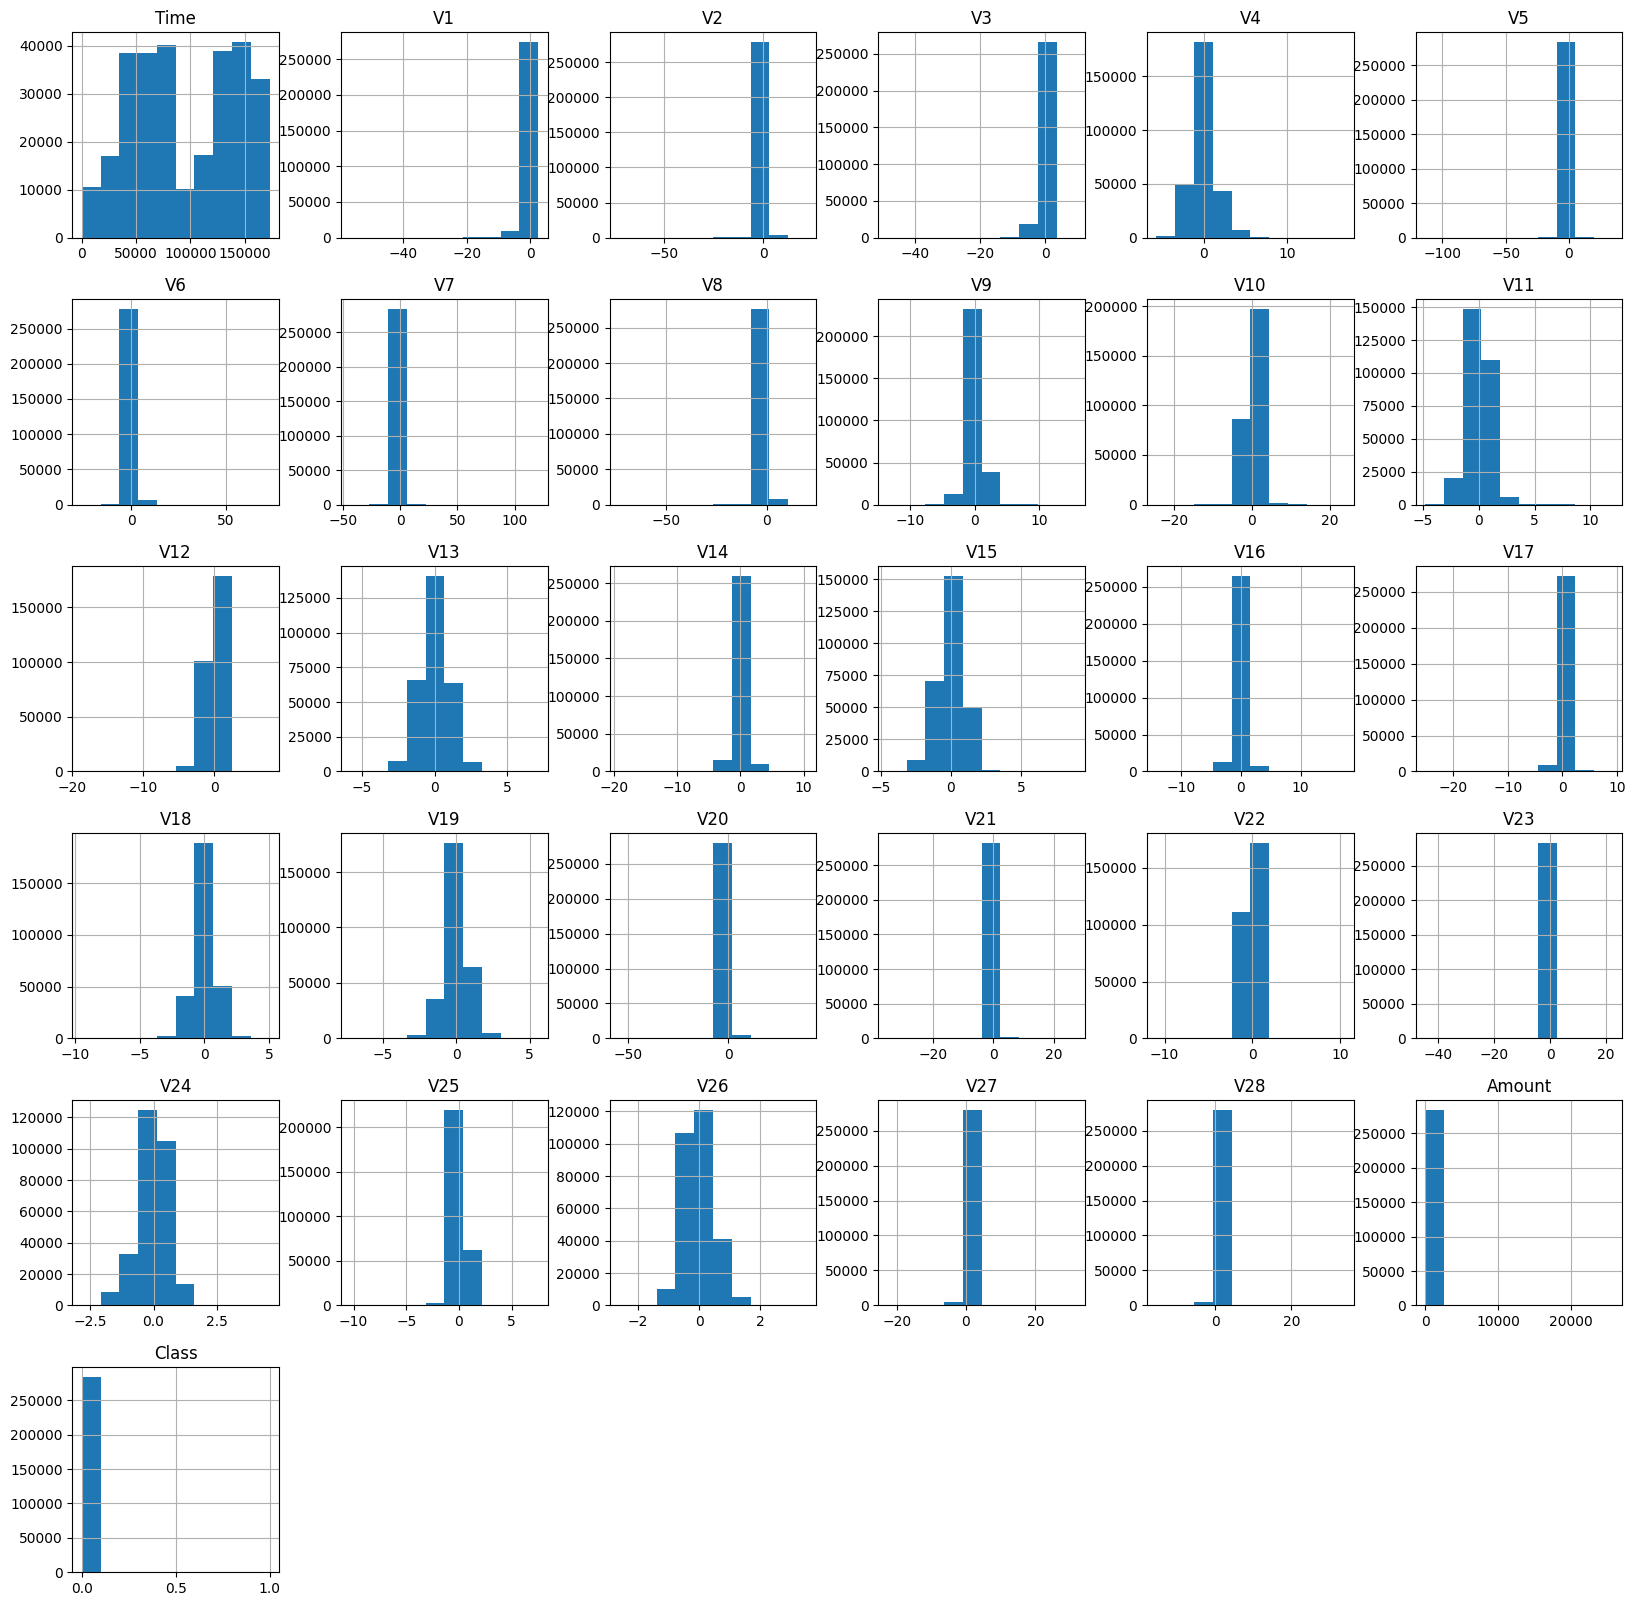

In [3]:
data.hist(figsize=(20, 20))
plt.show()

* Chekcing the top rows and some other attributes of the data set just to gather some more information about the given dataset 


بارگیری و بررسی ساختار ها و اطلاعات داده های موجود

In [18]:
# The first five rows of dataset 
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


checking the size of data set

In [19]:
print("(samples,features)")
data.shape

(samples,features)


(284807, 31)

checking data types to find out what we are working on

In [20]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Checking if we have any null values 

In [21]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [22]:
#checking the sum of null values to make sure there isnt any null value
# output is 0 which means we have no null value
nansC = data.isnull().sum().sum()
nansC

0

Checking how the dataset is distributed 


**our data set turned out to be imbalanced because of different sample count of different classes**

In [23]:
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Checking the fraud vs genuine graph

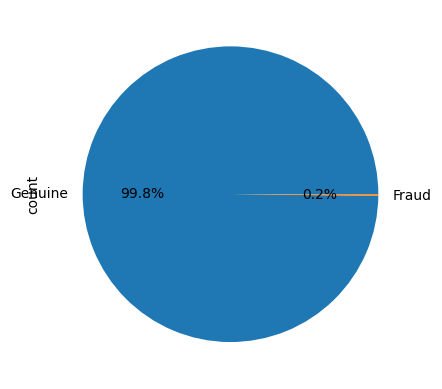

In [4]:
df = data.copy()
df[" "] = np.where(df["Class"] == 1 ,  "Fraud", "Genuine")
df[" "].value_counts().plot(kind="pie", autopct='%1.1f%%')
plt.show();

## Clustering the data set 

I used K-menas clustering but before that the data set needs to be normalized and reduced to a 2D space so so I apply PCA on it

normalizing it will heavily improve the percantage of its succes first we approach it without normalizing and just apply pca on non noramlizied data and the use k means on it

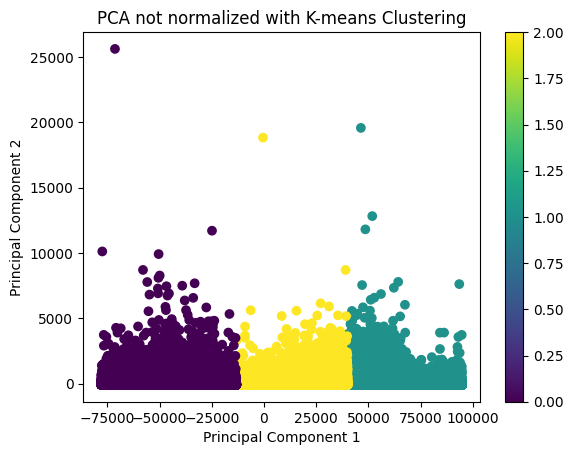

In [5]:
# Apply pca on the dataset
pca = PCA(n_components=2) 
data_pca = pca.fit_transform(data_copy)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(data_pca)

cluster_labels = kmeans.labels_

# Plot the clusters
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA not normalized with K-means Clustering')
plt.colorbar()

# Display the plot
plt.show()

now we go and check to see how the distribution is and to check if non normalized data is clustered in a usefull way or not

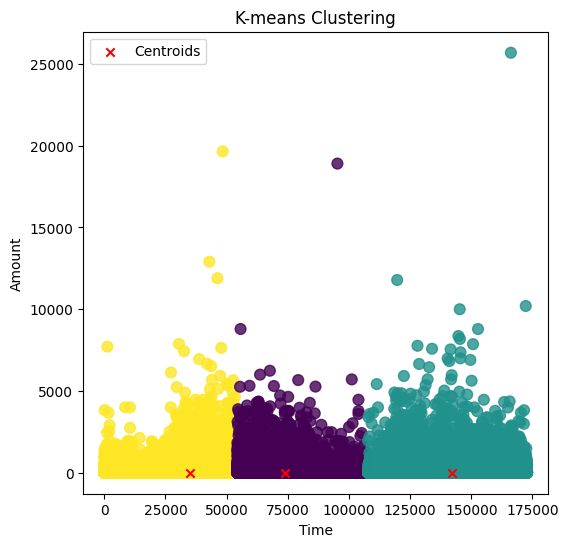

In [6]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)

# Dropping the label feature for clustering
K_data = data_copy.drop("Class", axis=1)
kmeans.fit_predict(K_data)
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

# Plot the clustering results
plt.figure(figsize=(6, 6))
plt.scatter(data_copy['Time'], data_copy['Amount'], c=cluster_labels, cmap='viridis', s=60, alpha=0.8)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', label='Centroids')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('K-means Clustering')
plt.legend()
plt.show()

The three below parts of code are from internet and I used them to check the amount of fraud data in each cluster

In [7]:
# Add a column Cluster to the dataset
data_copy["Cluster"] = cluster_labels

# Calculate the number of fraud samples in each cluster
fraud_samples_in_cluster = []
for cluster in data_copy["Cluster"].unique():
    cluster_data = data_copy[data_copy["Cluster"] == cluster]
    fraud_count = cluster_data["Class"].sum()
    fraud_samples_in_cluster.append(fraud_count)


for cluster in data_copy["Cluster"].unique():
    fraud_count = fraud_samples_in_cluster[cluster]
    print("Cluster {}: {} fraud samples".format(cluster, fraud_count))

Cluster 2: 142 fraud samples
Cluster 0: 177 fraud samples
Cluster 1: 173 fraud samples


In [8]:
# Calculate the number of samples in each cluster
sample_count = [sum(data_copy["Cluster"] == cluster) for cluster in data_copy["Cluster"].unique()]


for cluster in data_copy["Cluster"].unique():
    count = sample_count[cluster]
    print("Cluster {}: {} samples".format(cluster, count))

Cluster 2: 128490 samples
Cluster 0: 71661 samples
Cluster 1: 84656 samples


In [9]:
# Calculate the percentage of frauds in each cluster
fraud_percentage = np.array(fraud_samples_in_cluster) / np.array(sample_count) * 100


for cluster in data_copy["Cluster"].unique():
    print("Percentage of frauds in cluster {}: {}".format(cluster, fraud_percentage[cluster]))

Percentage of frauds in cluster 2: 0.11051443692116118
Percentage of frauds in cluster 0: 0.24699627412400052
Percentage of frauds in cluster 1: 0.20435645435645436


So you see that the dataset is imbalanced but in Kmeans on the non normalized 2d data (by pca) we have even distribution therefore we dont have an accurate clustering so to fix that we need to normalize data before applying pca

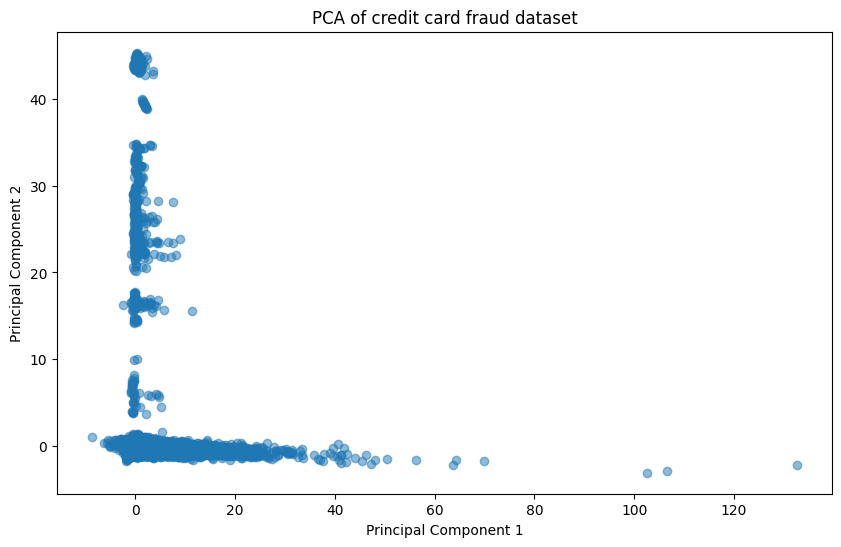

In [10]:

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)
# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(normalized_data)
# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA of credit card fraud dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Now we apply Kmeans to normalized and reduced to 2d data

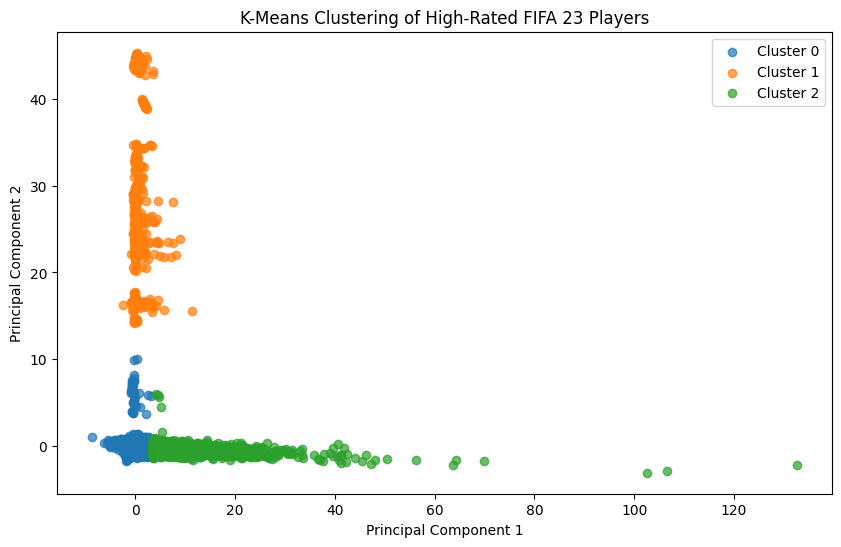

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_df)

# Add cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters

cluster_labels = kmeans.labels_
# Visualize clusters with player names attached
plt.figure(figsize=(10, 6))
for cluster_num in range(3):
    cluster_data = pca_df[pca_df['Cluster'] == cluster_num]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_num}', alpha=0.7)

plt.title('K-Means Clustering of High-Rated FIFA 23 Players')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

*Now we check the clustering accuracy and usefulness

In [12]:
# Add a column Cluster to the dataset
pca_df["Cluster"] = cluster_labels

# Calculate the number of fraud samples in each cluster
fraud_samples_in_cluster = []
for cluster in pca_df["Cluster"].unique():
    cluster_data = data[pca_df["Cluster"] == cluster]
    fraud_count = cluster_data["Class"].sum()
    fraud_samples_in_cluster.append(fraud_count)


for cluster in pca_df["Cluster"].unique():
    fraud_count = fraud_samples_in_cluster[cluster]
    print("Cluster {}: {} fraud samples".format(cluster, fraud_count))

Cluster 0: 0 fraud samples
Cluster 2: 492 fraud samples
Cluster 1: 0 fraud samples


In [13]:
# Calculate the number of samples in each cluster
sample_count = [sum(pca_df["Cluster"] == cluster) for cluster in pca_df["Cluster"].unique()]


for cluster in pca_df["Cluster"].unique():
    count = sample_count[cluster]
    print("Cluster {}: {} samples".format(cluster, count))

Cluster 0: 278806 samples
Cluster 2: 532 samples
Cluster 1: 5469 samples


In [14]:
# Calculate the percentage of frauds in each cluster
fraud_percentage = np.array(fraud_samples_in_cluster) / np.array(sample_count) * 100


for cluster in pca_df["Cluster"].unique():
    print("Percentage of frauds in cluster {}: {}".format(cluster, fraud_percentage[cluster]))

Percentage of frauds in cluster 0: 0.0
Percentage of frauds in cluster 2: 92.4812030075188
Percentage of frauds in cluster 1: 0.0


We see that the percentage is increased very much so the key is normalizing

## Clasification

* As we checked before only 0.2% of the data set are fraud transactions so we have an imbalanced dataset therefre we need to use sampling techniques

* note that hence the difference is large oversampling can be an even better approach because under sampling may cause loss of data and damage the classification model

* Fisrt we split data into train and test then we do the oversampling

In [3]:
# Separate features and target variable
x = df2.drop('Class', axis=1)  
y = df2['Class']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=100)
# Define the resampling strategy
sampling_strategy = 'auto'  # Automatically adjust to achieve a 50/50 distribution

# Apply SMOTE to the training set
smote = SMOTE(sampling_strategy=sampling_strategy)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

* Now we check distribution over Class and train set

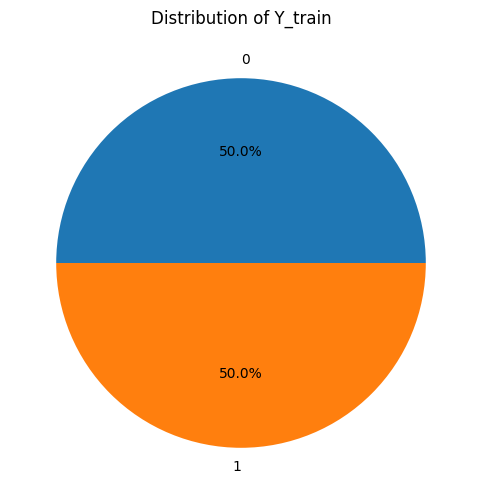

In [4]:
class_counts = Y_train.value_counts()
labels = class_counts.index
counts = class_counts.values

# Plot the pie chart of Y_train
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Y_train')
plt.show()

Now the data set is balanced so we can  normalize it and check the shape of it

In [5]:
# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(f'X_train{X_train.shape}\n, X_test{X_test.shape}\n, Y_train{Y_train.shape}\n, Y_test{Y_test.shape}')


X_train(454898, 30)
, X_test(56962, 30)
, Y_train(454898,)
, Y_test(56962,)


* spliting data into test and train then ovrsampling is better because it prevents data leakage

## Classification Algorithms

* SVM

* We create an SVM classifier using the default parameters.
* Then, we train the classifier on the normalized training data.
* Next, we use the trained classifier to predict the labels for the normalized test data.
* We calculate the accuracy of the predictions and print a classification report containing precision, recall, and F1-score for each class.
* Optionally, you can perform cross-validation using cross_val_score to evaluate the model's performance on different folds of the training data.

In [10]:
# Create an SVM classifier object
svm_classifier = SVC()

# Train the SVM classifier
svm_classifier.fit(X_train, Y_train)

# Predict the labels for the test set
svm_predictions = svm_classifier.predict(X_test)

# Generate the classification report
svm_classification_report = classification_report(Y_test, svm_predictions)

# Print the classification report
print("SVM Classification Report:")
print(svm_classification_report)

# Logistic Regression Algorithm

* In this code:

* We create a Logistic Regression classifier using the default parameters.
* Then, we train the classifier on the normalized training data.
* Next, we use the trained classifier to predict the labels for the normalized test data.
* We calculate the accuracy of the predictions and print a classification report containing precision, recall, and F1-score for each class.

In [9]:


# Create a Logistic Regression classifier
log_reg_classifier = LogisticRegression()

# Train the classifier
log_reg_classifier.fit(X_train, Y_train)

# Predict on the test set
predictions = log_reg_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)

# Generate classification report
print(classification_report(Y_test, predictions))

# Perform cross-validation (optional)
cv_scores = cross_val_score(log_reg_classifier, X_train, Y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Accuracy: 0.9917839963484428
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.15      0.83      0.25        96

    accuracy                           0.99     56962
   macro avg       0.58      0.91      0.63     56962
weighted avg       1.00      0.99      0.99     56962

Cross-validation scores: [0.98231479 0.98255661 0.9815344  0.98272129 0.98316095]
Mean CV accuracy: 0.9824576080066751


# Random Forrest Algorithm


* `rf_classifier = RandomForestClassifier()`: This line creates a Random Forest classifier object using the default parameters.

* `rf_classifier.fit(X_train, Y_train)`: Here, the classifier is trained on the training data X_train and corresponding labels Y_train.

* `rf_predictions = rf_classifier.predict(X_test)`: This line predicts the labels for the test data X_test using the trained classifier.

* `rf_classification_report = classification_report(Y_test, rf_predictions)`: The classification_report function generates a report containing precision, recall, F1-score, and support for each class based on the true labels Y_test and the predicted labels rf_predictions.

* Finally, print(rf_classification_report) prints the generated classification report.

In [6]:
# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier()

# Train the Random Forest classifier
rf_classifier.fit(X_train, Y_train)

# Predict the labels for the test set
rf_predictions = rf_classifier.predict(X_test)

# Generate the classification report
rf_classification_report = classification_report(Y_test, rf_predictions)

# Print the classification report
print("Random Forest Classification Report:")
print(rf_classification_report)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.80      0.78      0.79        96

    accuracy                           1.00     56962
   macro avg       0.90      0.89      0.89     56962
weighted avg       1.00      1.00      1.00     56962



# Decision Tree Algorithm

1. Creating the Decision Tree Classifier: You instantiate a Decision Tree classifier object using the default parameters.

2. Training the Classifier: The classifier is trained on the normalized training data (X_train_normalized, Y_train).

3. Predicting on the Test Set: Using the trained classifier, you predict the labels for the normalized test data (X_test_normalized).

4. Calculating Accuracy: You calculate the accuracy of the predictions using the accuracy_score function.

5. Generating the Classification Report: You print a classification report using classification_report, which includes precision, recall, F1-score, and support for each class based on the true labels Y_test and the predicted labels.

In [7]:

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier
dt_classifier.fit(X_train, Y_train)

# Predict on the test set
predictions = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)

# Generate classification report
print(classification_report(Y_test, predictions))

Accuracy: 0.9980337769039008
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.45      0.73      0.56        96

    accuracy                           1.00     56962
   macro avg       0.72      0.86      0.78     56962
weighted avg       1.00      1.00      1.00     56962



# KNN



1. **Import Libraries**: Import necessary libraries including `KNeighborsClassifier` for implementing KNN, and `accuracy_score` and `classification_report` for evaluating model performance.

2. **Create KNN Classifier**: Instantiate a KNN classifier object with default parameters.

3. **Train the Classifier**: Fit the classifier on normalized training data (`X_train_normalized`, `Y_train`).

4. **Predict on the Test Set**: Use the trained classifier to predict labels for normalized test data (`X_test_normalized`).

5. **Calculate Accuracy**: Calculate accuracy of predictions using `accuracy_score`.

6. **Generate Classification Report**: Print a classification report using `classification_report`, containing precision, recall, F1-score, and support for each class based on true labels `Y_test` and predicted labels.


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train_normalized, Y_train, X_test_normalized, Y_test are already defined

# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the classifier
knn_classifier.fit(X_train, Y_train)

# Predict on the test set
predictions = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)

# Generate classification report
print(classification_report(Y_test, predictions))


Accuracy: 0.9981742214107651
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.47      0.78      0.59        96

    accuracy                           1.00     56962
   macro avg       0.74      0.89      0.79     56962
weighted avg       1.00      1.00      1.00     56962

